# The Most Common Type of Museum in United States: Module for SQL, API, and Python Integration

## Import All Needed Python Libraries

In [4]:
import csv #enables manipulation of CSV files
import pandas as pd #data analysis library
import requests #enables http requests
import pyodbc #database library (connects to SQL Server)
from flask import Flask, g, render_template, abort, request #Libraries used to create Flask API
import json #enables use of json
import matplotlib #data visualization library
import matplotlib.pyplot as plt
import os #operating system library
import sys #enables python to access the system and find a direct path to a library (shown below)
sys.path.append('Insert direct path')
import pymssql #another library used to connect with database (direct path included above)


## Complete Automation: Download CSV from Kaggle.com
This needs to be worked through, due to the file being downloaded in a .zip file. Problem to be solved. Can you solve it?

In [2]:
#Create variable containing the exact URL link of the CSV
data_url = 'https://www.kaggle.com/imls/museum-directory/downloads/museum-directory.zip/1'


In [5]:
# Establish a file where the data can be transferred to on local computer
local_filename= "MuseumsFinal.csv"

#Kaggle Account - Login 
kaggle_pass = {'UserName': "XXXX", 'Password': "XXXX"}

#Request the file from Kaggle.com
r = requests.get(data_url)

#Pass in  credentials
r = requests.post(r.url, data = kaggle_pass)

In [6]:
#Establish a variable to open the url and create a reader
f = open(data_url, 'r')
with open(file_name, 'r') as csvfile:
    csvreader = csv.reader(csvfile)

fields = csvreader.net()

#CSV reader reads in data from the downloaded CSV file into a new file 
for row in csvreader:
    rows.append(row)

OSError: [Errno 22] Invalid argument: 'https://www.kaggle.com/imls/museum-directory/downloads/museum-directory.zip/1'

## Establish Connection Object to SQL Server: Create Table and Upload Data from CSV

In [ ]:
#Establish connection object
connection = pyodbc.connect(
    r'DRIVER={XXXX};'
    r'SERVER=XXXX;'
    r'DATABASE=XXXX;'
    r'UID=XXXX;'
    r'PWD=XXXX'
)

#Create connection cursor
cursor=connection.cursor()

#Create a table in SQL Server 
cursor.execute(
    '''
    create table Museums(

   MuseumID VARCHAR(MAX)
  ,MuseumName VARCHAR(MAX)
  ,LegalName VARCHAR(MAX)
  ,AlterateName VARCHAR(MAX) 
  ,MuseumType VARCHAR(MAX)
  ,InstitutionName VARCHAR(MAX)
  ,AdminStreetAddress VARCHAR(MAX)
  ,AdminCity VARCHAR(MAX)
  ,AdminState VARCHAR(MAX)
  ,AdminZipCode VARCHAR(MAX)
  ,PhysicalStreetAddress VARCHAR(MAX)
  ,PhysicalCity VARCHAR(MAX)
  ,PhysicalState VARCHAR(MAX)
  ,PhysicalZipCode VARCHAR(MAX)
  ,PhoneNumber VARCHAR(MAX)
  ,LocaleCode VARCHAR(MAX)
  ,CountyCode VARCHAR(MAX)
  ,StateCode VARCHAR(MAX)
  ,RegionCode VARCHAR(MAX)
  ,EmployerIDNumber VARCHAR(MAX)
  ,TaxPeriod VARCHAR(MAX)
  ,Income VARCHAR(MAX)
  ,Revenue VARCHAR(MAX)
   )'''
    )

#Insert data into table made above. ALL questions marks at the end indicate the number of columns
insert_query = 'insert into Museums(MuseumID,MuseumName,LegalName,AlterateName,MuseumType,InstitutionName,AdminStreetAddress,AdminCity,AdminState,AdminZipCode,PhysicalStreetAddress,PhysicalCity, PhysicalState,PhysicalZipCode,PhoneNumber,LocaleCode,CountyCode,StateCode,RegionCode,EmployerIDNumber,TaxPeriod,Income,Revenue) values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'
with open(
        r'Path of CSV',
        'r',encoding='latin1') as museum_file:
    insert_data = csv.reader(museum_file)
    cursor.executemany(insert_query, insert_data)
    
#committing the changes and close the cursor
cursor.commit()
cursor.close()


## Data Cleaning

When inserting the data, the column headers from the CSV file became data rows in the database. To fix this, run the below query in Python (or in SQL if preferred) to delete the applicable row. 

In [ ]:
conn = pyodbc.connect('DRIVER={XXXX};SERVER=XXXX;DATABASE=XXXX;UID=XXXX;PWD=XXXX')

df = pd.read_sql_query(
    '''
DELETE FROM Museums
    WHERE MuseumType ='Museum Type'
    '''
    , conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)


## Create API of Data: Exposes Data for Use


In [ ]:
# Establish connection string
CONNECTION_STRING ='DRIVER={XXXX};SERVER=XXXX;DATABASE=XXXX;UID=XXXX;PWD=XXXX'


# Setup Flask
app = Flask(__name__)
app.config.from_object(__name__)

# Setup simple home page
@app.route('/', methods =['GET'])
def home():
    return "<h1>Museum Data<h1><p>This data set is an evolving set that contains information regarding zoos, acquariums, and museums in the United States. Enjoy!"

# Check whether or nor the database is connected
@app.before_request
def before_request():
    try:
        g.sql_conn = pyodbc.connect(CONNECTION_STRING, autocommit=True)
    except Exception as e:
        print('Definitely not working')

@app.teardown_request
def teardown_request(exception):
    try:
        g.sql_conn.close()
    except AttributeError:
        pass


# Allow viewers to get all rows of Museum Data
@app.route('/alldata', methods=['GET'])
def get_cpi_data():
    curs = g.sql_conn.cursor()
    query = ("select * from nameofdatabase.dbo.museums")
    curs.execute(query)

    columns = [column[0] for column in curs.description]
    data = []

    for row in curs.fetchall():
        data.append(dict(zip(columns, row)))
    return json.dumps(data, indent=4, sort_keys=True, default=str)

#Run the API and make it available to anyone 
if __name__ == '__main__':
    app.run(host="0.0.0.0", port = 5001)
    


## Descriptive Statistics


###  Use SQL Server

In [7]:
#Establish connection with server
conn = pyodbc.connect('DRIVER={XXXX};SERVER=XXXX;DATABASE=XXXX;UID=XXXX;PWD=XXXX')

#Create cursor
cursor = conn.cursor()

#create a data frame based off of the query
df = pd.read_sql_query('Select * From Museums', conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)

#Show the first five columns in the database
df.head()



,MuseumID,MuseumName,LegalName,AlterateName,MuseumType,InstitutionName,AdminStreetAddress,AdminCity,AdminState,AdminZipCode,...,PhysicalZipCode,PhoneNumber,LocaleCode,CountyCode,StateCode,RegionCode,EmployerIDNumber,TaxPeriod,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,,HISTORY MUSEUM,,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,,9072485325,1,20,2,6,920071852,201312,602912,550236
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,,9077703692,4,20,2,6,920115504,201312,1379576,1323742
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,,9711 KENAI SPUR HWY,KENAI,AK,99611,...,,9072832000,3,122,2,6,921761906,201312,740030,729080
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,,HISTORIC PRESERVATION,,214 BIRCH STREET,KENAI,AK,99611,...,,2142472478,3,122,2,6,920165178,201412,0,0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,,HISTORY MUSEUM,,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,,9072652834,1,20,2,6,920071852,201312,602912,550236


In [8]:
#Provide additional context of count, unique, top, and frequency of each column in the database
df.describe()

,MuseumID,MuseumName,LegalName,AlterateName,MuseumType,InstitutionName,AdminStreetAddress,AdminCity,AdminState,AdminZipCode,...,PhysicalZipCode,PhoneNumber,LocaleCode,CountyCode,StateCode,RegionCode,EmployerIDNumber,TaxPeriod,Income,Revenue
count,33072,33072,33072,33072,33072,33072,33072,33072,33072,33072,...,33072,33072,33072,33072,33072,33072,33072,33072,33072,33072
unique,33072,31546,30430,1884,9,1582,25494,8621,51,15485,...,7012,20512,5,301,55,6,24917,68,10776,10168
top,8401701277,PLANETARIUM,PLANETARIUM,,HISTORIC PRESERVATION,,603 W JACKSON,NEW YORK,CA,74743,...,,,4,,6,4,,201312,0,0
freq,1,57,53,31145,14861,30323,63,297,2670,67,...,23851,10140,10510,2536,2672,7353,5518,10157,10740,10783


### Use CSV File

In [9]:
#Create dataframe and read in the data from the CSV file (obtained from Kaggle.com)
dfcsv = pd.read_csv('Museums.csv')

#Use pandas library to show the first five rows of data and the column names
dfcsv.head()



C:\Users\reaga\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [10]:
#Show general statistics of each column in the museum data set
dfcsv.describe()


,Museum ID,Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
count,3.307200e+04,9221.000000,33007.000000,33007.000000,32995.000000,30536.000000,33071.000000,33072.000000,23280.000000,2.296100e+04,2.229000e+04
mean,8.403812e+09,47805.644616,38.925372,-90.816757,2.505834,85.701926,29.065828,3.670083,201347.458548,1.069682e+08,2.097605e+07
std,2.662542e+06,30210.265032,5.126213,16.489087,1.211841,105.668318,15.431254,1.539274,67.670742,2.509287e+09,2.485197e+08
min,8.400100e+09,1002.000000,0.000000,-166.541260,1.000000,1.000000,1.000000,1.000000,199906.000000,-9.230000e+02,-2.127393e+06
25%,8.401801e+09,20180.000000,35.567720,-97.651155,1.000000,25.000000,17.000000,2.000000,201312.000000,0.000000e+00,0.000000e+00
50%,8.403600e+09,47448.000000,39.831640,-86.776840,2.000000,61.000000,29.000000,4.000000,201312.000000,8.781000e+03,3.307000e+03
75%,8.404801e+09,74743.000000,42.237490,-77.616930,4.000000,109.000000,42.000000,5.000000,201408.000000,2.163770e+05,1.676960e+05
max,8.409504e+09,99901.000000,70.669760,0.000000,4.000000,840.000000,90.000000,6.000000,201504.000000,8.318144e+10,5.840349e+09


In [11]:
#Find correlation in museum data set
dfcsv.corr()

,Museum ID,Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
Museum ID,1.000000,-0.071501,0.066653,0.111905,0.044825,0.110479,0.476511,-0.061107,-0.048685,0.122741,0.229280
Zip Code (Physical Location),-0.071501,1.000000,-0.129815,-0.912046,-0.018937,0.091399,-0.131572,0.948012,-0.034183,-0.015207,-0.017442
Latitude,0.066653,-0.129815,1.000000,0.067115,0.152018,-0.196045,0.207691,-0.119399,0.015625,0.018612,0.009191
Longitude,0.111905,-0.912046,0.067115,1.000000,0.012018,0.030812,0.244110,-0.905028,0.010373,0.036230,0.038907
Locale Code (NCES),0.044825,-0.018937,0.152018,0.012018,1.000000,-0.064103,0.096717,-0.006250,0.053115,-0.043662,-0.062027
County Code (FIPS),0.110479,0.091399,-0.196045,0.030812,-0.064103,1.000000,0.216928,0.101434,-0.005593,-0.017368,-0.001727
State Code (FIPS),0.476511,-0.131572,0.207691,0.244110,0.096717,0.216928,1.000000,-0.132678,0.008909,-0.011480,-0.024993
Region Code (AAM),-0.061107,0.948012,-0.119399,-0.905028,-0.006250,0.101434,-0.132678,1.000000,-0.008649,-0.053601,-0.057080
Tax Period,-0.048685,-0.034183,0.015625,0.010373,0.053115,-0.005593,0.008909,-0.008649,1.000000,-0.026145,-0.039034
Income,0.122741,-0.015207,0.018612,0.036230,-0.043662,-0.017368,-0.011480,-0.053601,-0.026145,1.000000,0.799915


## Create Visualization: Income vs. Expenses in United States Museums

Visualizations are supposed to tell a story. However, based on the below visualization it is important to recognize how and when visualizations should be used. Unfortunately, these visualizations don't tell too much of a story - so let's create another visual. 

Text(0.5,0.98,'Museum Income vs. Expenses')

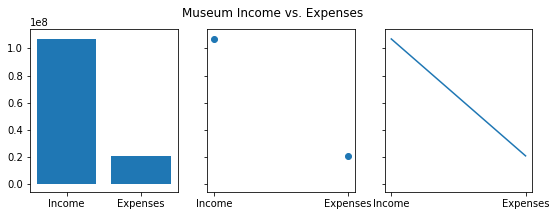

In [12]:
#Input data points (these are the mean data points from our statistics shown above) into a list
data = {'Income': 106968200, 'Expenses': 20976050}
#Create lists based on data
names = list(data.keys())
values = list(data.values())

#Code to create the Visualization
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Museum Income vs. Expenses')




## Create Visualization: Most Common Museum in United States 

In [13]:
#Create dataframe from SQL query
museumstats = pd.read_sql_query(('SELECT * FROM Museums'), conn, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)
museumstats.head()

,MuseumID,MuseumName,LegalName,AlterateName,MuseumType,InstitutionName,AdminStreetAddress,AdminCity,AdminState,AdminZipCode,...,PhysicalZipCode,PhoneNumber,LocaleCode,CountyCode,StateCode,RegionCode,EmployerIDNumber,TaxPeriod,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,,HISTORY MUSEUM,,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,,9072485325,1,20,2,6,920071852,201312,602912,550236
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,,9077703692,4,20,2,6,920115504,201312,1379576,1323742
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,,9711 KENAI SPUR HWY,KENAI,AK,99611,...,,9072832000,3,122,2,6,921761906,201312,740030,729080
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,,HISTORIC PRESERVATION,,214 BIRCH STREET,KENAI,AK,99611,...,,2142472478,3,122,2,6,920165178,201412,0,0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,,HISTORY MUSEUM,,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,,9072652834,1,20,2,6,920071852,201312,602912,550236


In [14]:
#Find additional statistics of the specific column, Revenue, that we will create a visualization about
museumstats['Revenue'].describe()

count     33072
unique    10168
top           0
freq      10783
Name: Revenue, dtype: object

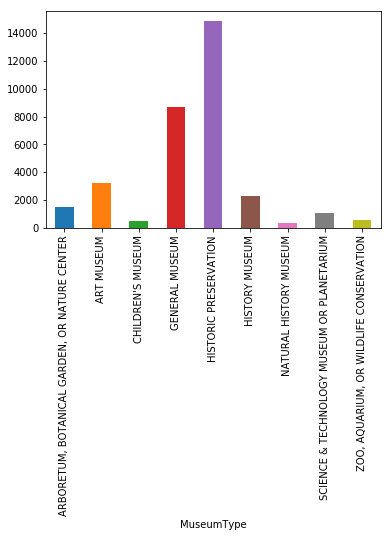

In [15]:
#Group the revenue by the type of museum
museum_group = museumstats.groupby('MuseumType')
#Develop the graph data and initiate the size of the bar to be contingent upon the size of the revenue compared to other museum type revenues
museum_graphdata = museum_group.size()
#Name the graph and identify what type of graph
my_plot = museum_graphdata.plot(kind='bar')

### References:

https://ramhiser.com/2012/11/23/how-to-download-kaggle-data-with-python-and-requests-dot-py/
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html#pandas.read_sql_table
https://matplotlib.org/users/pyplot_tutorial.html
https://stackoverflow.com/questions/43120112/module-not-found-during-import-in-jupyter-notebook
https://stackoverflow.com/questions/48638592/python-attributeerror-nonetype-object-has-no-attribute-cursor
https://stackoverflow.com/questions/11451101/retrieving-data-from-sql-using-pyodbc
http://pandas.pydata.org/pandas-docs/stable/10min.html
http://pandas.pydata.org/pandas-docs/version/0.19.1/io.html#io-sql
https://matplotlib.org/